In [46]:
import pandas as pd
import numpy as npaa
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [47]:
house_prices = sklearn.datasets.load_boston()

In [48]:
house_price = pd.DataFrame(house_prices.data,columns=house_prices.feature_names )

In [49]:
house_price['PRICE'] = house_prices.target

In [50]:
house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
#check the number of columns of the data
house_price.shape

(506, 14)

In [52]:
#checking if the value is missing
house_price.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [53]:
# describing dataframe
house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [60]:
#analyzing correlation beetwen columns
cor_feature = house_price.corr()

<AxesSubplot:>

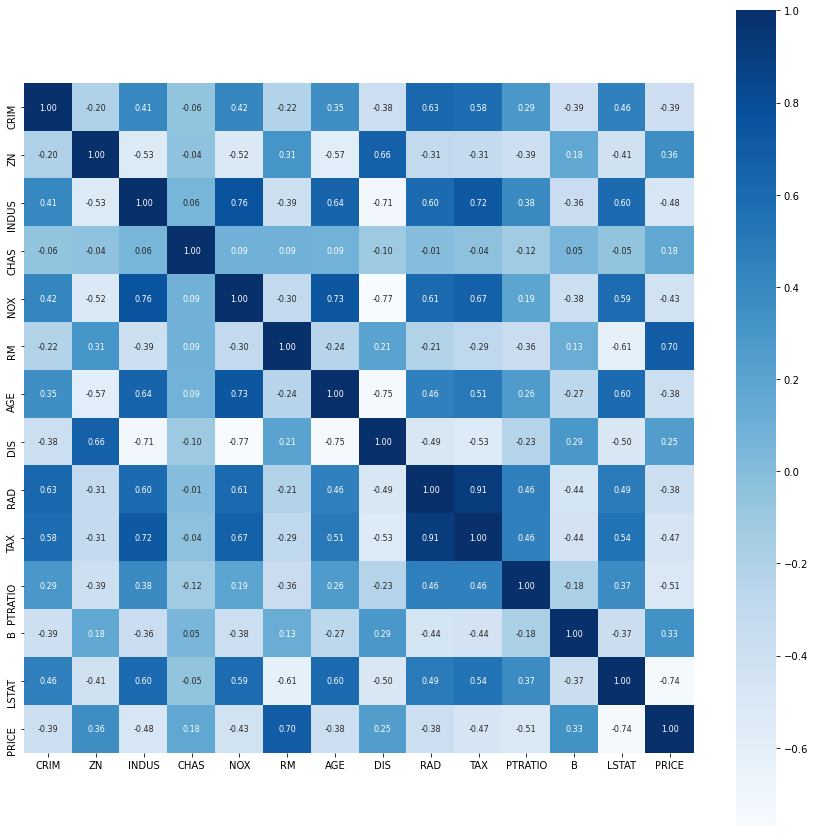

In [71]:
plt.figure(figsize=(15,15))
sns.heatmap(cor_feature,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [80]:
x = house_price.drop(['PRICE'],axis=1)
y = house_price['PRICE']

In [96]:
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [97]:
#x_trian take the 80% of the data so as to train and other left data is for testing the data 
x.shape, X_train.shape, X_test.shape

((506, 13), (354, 13), (152, 13))

In [98]:
#model training
model = XGBRegressor()

In [99]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [115]:
prediction1 = model.predict(X_train)

In [117]:
score3 = metrics.r2_score(y_train,prediction1)
score4 = metrics.mean_absolute_error(y_train,prediction1)

In [118]:
score3,score4

(0.9999981524529594, 0.008905995902368579)

In [119]:
prediction = model.predict(X_test)

In [120]:
score1 = metrics.r2_score(y_test,prediction)
score2 = metrics.mean_absolute_error(y_test,prediction)

In [121]:
score1,score2

(0.883953064652828, 2.176555267133211)